# Analysis for salmon trap data in the Dungenesss River from 2014
### Description of data:
Data is stored in MS Excel files with one sheet per year. For 2014, the counts for wild and hatchery fish are separate.


using new file with correction to make new dungeness 2014 all file

In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen
from bs4 import BeautifulSoup
import io
import datetime
import matplotlib.dates as mdates

In [10]:
year = "2014"
# #read file in Windows
try:
    df_year = pd.read_excel(
   io="C:/Users/maria/OneDrive/Documents/data/pied_piper/Dungeness smolt trap 2005 - 2014 JHA error correction.xlsx",
   sheet_name =year,
    header = [0,1,2,3]
)
except PermissionError:
    print("Permission Error. Close the file, if it is open.")
    

df_year.head()
columns = list(df_year)
print(columns)

[('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Date'), ('Trapping Intervals', 'Trapping dates and times ', 'Down', 'Time'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Up'), ('Trapping Intervals', 'Trapping dates and times ', 'Up', 'Time'), ('Trapping Intervals', 'Hours Fished', 'In', 'TimeIn'), ('Trapping Intervals', 'Hours Fished', 'Out', 'TimeOut'), ('Chinook0', 'Total', 'Unnamed: 6_level_2', 10), ('Chinook0', 'Hatchery', 'unmk', '10\\12'), ('Chinook0', 'Hatchery', 'CWT', '10\\30'), ('Chinook0', 'Wild', 'Unnamed: 9_level_2', '10\\00'), ('Chinook1', 'Total', 'Unnamed: 10_level_2', 11), ('Chinook1', 'Hatchery', 'CWT', '11\\30'), ('Chinook1', 'Hatchery', 'Unmarked', '11\\12'), ('Chinook1', 'Wild', 'Unnamed: 13_level_2', '11\\00'), ('Coho1', 'Total', 'Unnamed: 14_level_2', 41), ('Coho1', 'Hatchery', 'Ad-mark', '41\\13'), ('Coho1', 'Hatchery', 'Ad-CWT', '41\\19'), ('Coho1', 'Hatchery', 'CWT only', '41\\30'), ('Coho1', 'Hatchery', 'unmark', '41\\12'), ('Coho1

In [11]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

Trapping Intervals                                                \
    Trapping dates and times                                   Hours Fished   
                         Down                    Up                      In   
                         Date       Time         Up       Time       TimeIn   
0                  2014-01-16  15.000000 2014-01-17   8.500000    17.500000   
1                  2014-01-17   8.500000 2014-01-18  17.500000     9.000000   
2                  2014-01-18  17.500000 2014-01-19  10.250000    16.750000   
3                  2014-01-19  10.250000 2014-01-19  17.000000          NaN   
4                  2014-01-19  17.000000 2014-01-20   8.000000          NaN   
5                  2014-01-20   8.000000 2014-01-20  17.000000          NaN   
6                  2014-01-20  17.000000 2014-01-21   8.000000          NaN   
7                  2014-01-21   8.000000 2014-01-21  15.500000          NaN   
8                  2014-01-21  15.500000 2014-01-22  17.000000    25.500000   
9                  2014-01-22  17.000000 2014-01-23   8.250000    15.250000   
10                 2014-01-23   8.250000 2014-01-24  10.500000    26.250000   
11                 2014-01-24  10.500000 2014-01-24  17.000000          NaN   
12                 2014-01-24  17.000000 2014-01-25  10.500000          NaN   
13                 2014-01-25  10.500000 2014-01-25  17.000000          NaN   
14                 2014-01-25  17.000000 2014-01-26  11.500000          NaN   
15                 2014-01-26  11.500000 2014-01-26  17.500000     6.000000   
16                 2014-01-26  17.500000 2014-01-27   8.000000    14.500000   
17                 2014-01-27   8.000000 2014-01-27  17.500000     9.500000   
18                 2014-01-27  17.500000 2014-01-28   8.000000    14.500000   
19                 2014-01-28   8.000000 2014-01-29  10.500000          NaN   
20                 2014-01-29  10.500000 2014-01-30  13.750000          NaN   
21                 2014-01-30  13.750000 2014-01-31   8.000000    18.250000   
22                 2014-01-31   8.000000 2014-02-01  10.500000    26.500000   
23                 2014-02-01  10.500000 2014-02-02   8.500000    22.000000   
24                 2014-02-02   8.500000 2014-02-03  10.500000    26.000000   
25                 2014-02-03  10.500000 2014-02-04   8.500000    22.000000   
26                 2014-02-04   8.500000 2014-02-05  10.000000    25.500000   
27                 2014-02-05  10.000000 2014-02-06   8.000000    22.000000   
28                 2014-02-06   8.000000 2014-02-07  14.000000    30.000000   
29                 2014-02-07  14.000000 2014-02-08  12.000000    22.000000   
30                 2014-02-08  12.000000 2014-02-09  11.000000    23.000000   
31                 2014-02-09  11.000000 2014-02-10  17.000000    30.000000   
32                 2014-02-10  17.000000 2014-02-11   8.250000    15.250000   
33                 2014-02-11   8.250000 2014-02-11  17.000000     8.750000   
34                 2014-02-11  17.000000 2014-02-12   8.250000    15.250000   
35                 2014-02-12   8.250000 2014-02-12  17.000000     8.750000   
36                 2014-02-12  17.000000 2014-02-13   8.000000    15.000000   
37                 2014-02-13   8.000000 2014-02-13  18.000000    10.000000   
38                 2014-02-13  18.000000 2014-02-14   8.500000    14.500000   
39                 2014-02-14   8.500000 2014-02-14  17.500000     9.000000   
40                 2014-02-14  17.500000 2014-02-15   8.500000    15.000000   
41                 2014-02-15   8.500000 2014-02-15  18.000000     9.500000   
42                 2014-02-15  18.000000 2014-02-16   8.500000    14.500000   
43                 2014-02-16   8.500000 2014-02-16  17.000000     8.500000   
44                 2014-02-16  17.000000 2014-02-17   8.500000    15.500000   
45                 2014-02-17   8.500000 2014-02-17  17.000000     8.500000   
46                 2014-02-17  17.000000 2014-02-18   8.50000

In [12]:
list_names = []
for col in df_year.columns.values:
    
    check0 = str(col[0])
    check2 = str(col[2])
    check3 = str(col[3])
    if check3[0].isdigit():
        
        if (str(col[2])[0:7] == 'Unnamed'):
            list_names.append(str(col[0]) + '_' + str(col[1]))
        else:
            list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
            
    
        
    elif check0 == 'Trapping Intervals':
        list_names.append(str(col[2]) + '_' + str(col[3]))
        
    elif (str(col[3])[0:7] == 'Unnamed'):
        list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2]))
    
    else:
        
        list_names.append(str(col[0]) + '_' + str(col[1]) + '_' + str(col[2])+ '_' + str(col[3]))

# df_year = df_year.iloc[:-3] #remove last line which has no data

df_year.columns = list_names

#rename columns to be consistent with previous years
df_year = df_year.rename(columns={'Down_Date': "Date",
                        'Up_Time': "Up_time",
                        'Down_Time': "Down_time",          
                        'Up_Up': "Up_date",
                        'In_TimeIn': "In",
                        'Out_TimeOut': "Out"})

#get rid of columns with Out !=0 and fill 0 instead of NANs
df_year.fillna(0, inplace=True)
df_year= df_year[df_year['Out'] == 0]
df_year = df_year.iloc[:-2]

# #make columns that are consistent with previous years
df_year['Up'] = df_year['Up_date'] + pd.to_timedelta(df_year["Up_time"], unit='hours')
df_year['Down'] = df_year['Date'] + pd.to_timedelta(df_year["Down_time"], unit = 'hours')
# df_year['Up'] = pd.to_datetime(df_year['Up_date'].astype(str) + ' ' + df_year['Up_time'].astype(str), utc = False)
# df_year['Down'] = pd.to_datetime(df_year['Date'].astype(str) + ' ' + df_year['Down_time'].astype(str), utc = False)
df_year['midpoint'] = df_year['Down'] + (df_year['Up'] - df_year['Down'])/2

print(df_year.columns)

Index(['Date', 'Down_time', 'Up_date', 'Up_time', 'In', 'Out',
       'Chinook0_Total', 'Chinook0_Hatchery_unmk', 'Chinook0_Hatchery_CWT',
       'Chinook0_Wild', 'Chinook1_Total', 'Chinook1_Hatchery_CWT',
       'Chinook1_Hatchery_Unmarked', 'Chinook1_Wild', 'Coho1_Total',
       'Coho1_Hatchery_Ad-mark', 'Coho1_Hatchery_Ad-CWT',
       'Coho1_Hatchery_CWT only', 'Coho1_Hatchery_unmark',
       'Coho1_Wild_UC mark', 'Coho1_Wild_Unmark', 'Chum_Wild_Unmarked',
       'Coho Fry_Wild_Unmarked', 'Pink_Unmark', 'Steelhead Smolts_Total',
       'Steelhead Smolts_Hatchery_Ad-mark', 'Steelhead Smolts_Hatchery_Ad-CWT',
       'Steelhead Smolts_Wild_UC mark', 'Steelhead Smolts_Wild_Unmark',
       'Cutthroat_Wild_Smolt', 'Cutthroat_Wild_Parr', 'Trout Parr_Wild_Total',
       'Trout Parr_Wild_Steelhead', 'Dolly\Bull_Wild_Smolt',
       'Dolly\Bull_Adult_Stlh', 'Dolly\Bull_Adult_Stlh_Comments',
       'Dolly\Bull_Trap Out_Stoppers w\partial catch removed from catch for estimated catch for outage p

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(


In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

Date  Down_time              Up_date    Up_time  \
0    2014-01-16 00:00:00  15.000000  2014-01-17 00:00:00   8.500000   
1    2014-01-17 00:00:00   8.500000  2014-01-18 00:00:00  17.500000   
2    2014-01-18 00:00:00  17.500000  2014-01-19 00:00:00  10.250000   
8    2014-01-21 00:00:00  15.500000  2014-01-22 00:00:00  17.000000   
9    2014-01-22 00:00:00  17.000000  2014-01-23 00:00:00   8.250000   
10   2014-01-23 00:00:00   8.250000  2014-01-24 00:00:00  10.500000   
15   2014-01-26 00:00:00  11.500000  2014-01-26 00:00:00  17.500000   
16   2014-01-26 00:00:00  17.500000  2014-01-27 00:00:00   8.000000   
17   2014-01-27 00:00:00   8.000000  2014-01-27 00:00:00  17.500000   
18   2014-01-27 00:00:00  17.500000  2014-01-28 00:00:00   8.000000   
21   2014-01-30 00:00:00  13.750000  2014-01-31 00:00:00   8.000000   
22   2014-01-31 00:00:00   8.000000  2014-02-01 00:00:00  10.500000   
23   2014-02-01 00:00:00  10.500000  2014-02-02 00:00:00   8.500000   
24   2014-02-02 00:00:00   8.500000  2014-02-03 00:00:00  10.500000   
25   2014-02-03 00:00:00  10.500000  2014-02-04 00:00:00   8.500000   
26   2014-02-04 00:00:00   8.500000  2014-02-05 00:00:00  10.000000   
27   2014-02-05 00:00:00  10.000000  2014-02-06 00:00:00   8.000000   
28   2014-02-06 00:00:00   8.000000  2014-02-07 00:00:00  14.000000   
29   2014-02-07 00:00:00  14.000000  2014-02-08 00:00:00  12.000000   
30   2014-02-08 00:00:00  12.000000  2014-02-09 00:00:00  11.000000   
31   2014-02-09 00:00:00  11.000000  2014-02-10 00:00:00  17.000000   
32   2014-02-10 00:00:00  17.000000  2014-02-11 00:00:00   8.250000   
33   2014-02-11 00:00:00   8.250000  2014-02-11 00:00:00  17.000000   
34   2014-02-11 00:00:00  17.000000  2014-02-12 00:00:00   8.250000   
35   2014-02-12 00:00:00   8.250000  2014-02-12 00:00:00  17.000000   
36   2014-02-12 00:00:00  17.000000  2014-02-13 00:00:00   8.000000   
37   2014-02-13 00:00:00   8.000000  2014-02-13 00:00:00  18.000000   
38   2014-02-13 00:00:00  18.000000  2014-02-14 00:00:00   8.500000   
39   2014-02-14 00:00:00   8.500000  2014-02-14 00:00:00  17.500000   
40   2014-02-14 00:00:00  17.500000  2014-02-15 00:00:00   8.500000   
41   2014-02-15 00:00:00   8.500000  2014-02-15 00:00:00  18.000000   
42   2014-02-15 00:00:00  18.000000  2014-02-16 00:00:00   8.500000   
43   2014-02-16 00:00:00   8.500000  2014-02-16 00:00:00  17.000000   
44   2014-02-16 00:00:00  17.000000  2014-02-17 00:00:00   8.500000   
45   2014-02-17 00:00:00   8.500000  2014-02-17 00:00:00  17.000000   
46   2014-02-17 00:00:00  17.000000  2014-02-18 00:00:00   8.500000   
47   2014-02-18 00:00:00   8.500000  2014-02-18 00:00:00  17.000000   
48   2014-02-18 00:00:00  17.000000  2014-02-19 00:00:00   8.333333   
49   2014-02-19 00:00:00   8.333333  2014-02-19 00:00:00  17.000000   
50   2014-02-19 00:00:00  17.000000  2014-02-20 00:00:00   8.000000   
51   2014-02-20 00:00:00   8.000000  2014-02-20 00:00:00  17.500000   
52   2014-02-20 00:00:00  17.500000  2014-02-21 00:00:00   8.500000   
53   2014-02-21 00:00:00   8.500000  2014-02-21 00:00:00  17.000000   
54   2014-02-21 00:00:00  17.000000  2014-02-22 00:00:00   8.500000   
55   2014-02-22 00:00:00   8.500000  2014-02-22 00:00:00  16.500000   
56   2014-02-22 00:00:00  16.500000  2014-02-23 00:00:00   9.000000   
57   2014-02-23 00:00:00   9.000000  2014-02-23 00:00:00  17.000000   
58   2014-02-23 00:00:00  17.000000  2014-02-24 00:00:00   8.000000   
59   2014-02-24 00:00:00   8.000000  2014-02-24 00:00:00  17.000000   
60   2014-02-24 00:00:00  17.000000  2014-02-25 00:00:00   7.000000   
61   2014-02-25 00:00:00   7.000000  2014-02-25 00:00:00  17.500000   
62   2014-02-25 00:00:00  17.500000  2014-02-26 00:00:00   8.000000   
63   2014-02-26 00:00:00   8.000000  2014-02-26 00:00:00  17.500000   
64   2014-02-26 00:00:00  17.500000  2014-02-27 00:00:00   8.500000   
65   2014-02-27 00:00:00   8.500000  2014-02-27 00:00:00  16.000000   
66   2014-02-27 00:00:00  16.000000  2014-02

In [14]:
#getting temperature data
#reading html data

url = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year + "_WTM_FM.TXT"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

url_flow = "https://apps.ecology.wa.gov/ContinuousFlowAndWQ/StationData/Prod/18A050/18A050_" + year+ "_DSG_FM.TXT"
html_flow = urlopen(url_flow).read()
soup_flow = BeautifulSoup(html_flow, features="html.parser")

# kill all script and style elements
for script in soup_flow(["script", "style"]):
    script.extract()    # rip it out


text_flow = soup_flow.get_text()
text = text[522:-72]
text_flow = text_flow[519:-159]

df = pd.read_csv(io.StringIO(text), sep='\s+', header = None, names = ["date", "time", "temp", "quality"])
df_flow = pd.read_csv(io.StringIO(text_flow), sep='\s+', header = None, names = ["date", "time", "flow", "quality"])


In [16]:
df['midpoint'] =  pd.to_datetime(df['date'] + ' ' + df['time'])

df_year_trial = df_year.dropna(subset = ['midpoint'])
df_year_trial = df_year_trial.sort_values("midpoint")
df_year_temp = pd.merge_asof(df_year_trial,df, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

df_flow['midpoint'] =  pd.to_datetime(df_flow['date'] + ' ' + df_flow['time'])

df_year_temp_flow = pd.merge_asof(
    df_year_temp.dropna(subset = ['midpoint']),df_flow, on="midpoint",tolerance=pd.Timedelta(minutes = 15))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

Date  Down_time              Up_date    Up_time  \
0    2014-01-16 00:00:00  15.000000  2014-01-17 00:00:00   8.500000   
1    2014-01-17 00:00:00   8.500000  2014-01-18 00:00:00  17.500000   
2    2014-01-18 00:00:00  17.500000  2014-01-19 00:00:00  10.250000   
3    2014-01-21 00:00:00  15.500000  2014-01-22 00:00:00  17.000000   
4    2014-01-22 00:00:00  17.000000  2014-01-23 00:00:00   8.250000   
5    2014-01-23 00:00:00   8.250000  2014-01-24 00:00:00  10.500000   
6    2014-01-26 00:00:00  11.500000  2014-01-26 00:00:00  17.500000   
7    2014-01-26 00:00:00  17.500000  2014-01-27 00:00:00   8.000000   
8    2014-01-27 00:00:00   8.000000  2014-01-27 00:00:00  17.500000   
9    2014-01-27 00:00:00  17.500000  2014-01-28 00:00:00   8.000000   
10   2014-01-30 00:00:00  13.750000  2014-01-31 00:00:00   8.000000   
11   2014-01-31 00:00:00   8.000000  2014-02-01 00:00:00  10.500000   
12   2014-02-01 00:00:00  10.500000  2014-02-02 00:00:00   8.500000   
13   2014-02-02 00:00:00   8.500000  2014-02-03 00:00:00  10.500000   
14   2014-02-03 00:00:00  10.500000  2014-02-04 00:00:00   8.500000   
15   2014-02-04 00:00:00   8.500000  2014-02-05 00:00:00  10.000000   
16   2014-02-05 00:00:00  10.000000  2014-02-06 00:00:00   8.000000   
17   2014-02-06 00:00:00   8.000000  2014-02-07 00:00:00  14.000000   
18   2014-02-07 00:00:00  14.000000  2014-02-08 00:00:00  12.000000   
19   2014-02-08 00:00:00  12.000000  2014-02-09 00:00:00  11.000000   
20   2014-02-09 00:00:00  11.000000  2014-02-10 00:00:00  17.000000   
21   2014-02-10 00:00:00  17.000000  2014-02-11 00:00:00   8.250000   
22   2014-02-11 00:00:00   8.250000  2014-02-11 00:00:00  17.000000   
23   2014-02-11 00:00:00  17.000000  2014-02-12 00:00:00   8.250000   
24   2014-02-12 00:00:00   8.250000  2014-02-12 00:00:00  17.000000   
25   2014-02-12 00:00:00  17.000000  2014-02-13 00:00:00   8.000000   
26   2014-02-13 00:00:00   8.000000  2014-02-13 00:00:00  18.000000   
27   2014-02-13 00:00:00  18.000000  2014-02-14 00:00:00   8.500000   
28   2014-02-14 00:00:00   8.500000  2014-02-14 00:00:00  17.500000   
29   2014-02-14 00:00:00  17.500000  2014-02-15 00:00:00   8.500000   
30   2014-02-15 00:00:00   8.500000  2014-02-15 00:00:00  18.000000   
31   2014-02-15 00:00:00  18.000000  2014-02-16 00:00:00   8.500000   
32   2014-02-16 00:00:00   8.500000  2014-02-16 00:00:00  17.000000   
33   2014-02-16 00:00:00  17.000000  2014-02-17 00:00:00   8.500000   
34   2014-02-17 00:00:00   8.500000  2014-02-17 00:00:00  17.000000   
35   2014-02-17 00:00:00  17.000000  2014-02-18 00:00:00   8.500000   
36   2014-02-18 00:00:00   8.500000  2014-02-18 00:00:00  17.000000   
37   2014-02-18 00:00:00  17.000000  2014-02-19 00:00:00   8.333333   
38   2014-02-19 00:00:00   8.333333  2014-02-19 00:00:00  17.000000   
39   2014-02-19 00:00:00  17.000000  2014-02-20 00:00:00   8.000000   
40   2014-02-20 00:00:00   8.000000  2014-02-20 00:00:00  17.500000   
41   2014-02-20 00:00:00  17.500000  2014-02-21 00:00:00   8.500000   
42   2014-02-21 00:00:00   8.500000  2014-02-21 00:00:00  17.000000   
43   2014-02-21 00:00:00  17.000000  2014-02-22 00:00:00   8.500000   
44   2014-02-22 00:00:00   8.500000  2014-02-22 00:00:00  16.500000   
45   2014-02-22 00:00:00  16.500000  2014-02-23 00:00:00   9.000000   
46   2014-02-23 00:00:00   9.000000  2014-02-23 00:00:00  17.000000   
47   2014-02-23 00:00:00  17.000000  2014-02-24 00:00:00   8.000000   
48   2014-02-24 00:00:00   8.000000  2014-02-24 00:00:00  17.000000   
49   2014-02-24 00:00:00  17.000000  2014-02-25 00:00:00   7.000000   
50   2014-02-25 00:00:00   7.000000  2014-02-25 00:00:00  17.500000   
51   2014-02-25 00:00:00  17.500000  2014-02-26 00:00:00   8.000000   
52   2014-02-26 00:00:00   8.000000  2014-02-26 00:00:00  17.500000   
53   2014-02-26 00:00:00  17.500000  2014-02-27 00:00:00   8.500000   
54   2014-02-27 00:00:00   8.500000  2014-02-27 00:00:00  16.000000   
55   2014-02-27 00:00:00  16.000000  2014-02

In [17]:
df_year_temp_flow = df_year_temp_flow.rename(columns={'Chinook0_Hatchery_unmk':'Chinook0_Hat',
                                                      'Chinook0_Hatchery_CWT':'Chinook0_Hat1',
                                                      'Chinook1_Hatchery_Unmarked':'Chinook1_Hat',
                                                      'Chinook1_Hatchery_CWT':'Chinook1_Hat1',
                                                      'Coho1_Hatchery_Ad-mark':'Coho1_Hat',
                                                      'Coho1_Hatchery_Ad-CWT':'Coho1_Hat1',
                                                      'Coho1_Hatchery_CWT only':'Coho1_Hat2',
                                                      'Coho1_Hatchery_unmark':'Coho1_Hat3',
                                                      'Coho1_Wild_UC mark':'Coho1_Wild',
                                                      'Coho1_Wild_Unmark':'Coho1_Wild1',
                                                      'Steelhead Smolts_Total':'Steelhead1_Total',
                                                      'Steelhead Smolts_Hatchery_Ad-mark':'Steelhead1_Hat',
                                                      'Steelhead Smolts_Hatchery_Ad-CWT':'Steelhead1_Hat1',
                                                      'Steelhead Smolts_Wild_Unmark':'Steelhead1_Wild',
                                                      'Steelhead Smolts_Wild_UC mark':'Steelhead1_Wild1'})
#aggregating data
groupedby_dates_year = df_year_temp_flow.groupby(by=["Date"]).agg({'In':'sum',
                                                                   'Out':'sum',
                                                                   'Chinook0_Total':'sum',
                                                                   'Chinook0_Hat':'sum',
                                                                   'Chinook0_Hat1':'sum',
                                                                   'Chinook0_Wild':'sum',
                                                                   'Chinook1_Total':'sum',
                                                                   'Chinook1_Hat':'sum',
                                                                   'Chinook1_Hat1':'sum',
                                                                   'Chinook1_Wild':'sum',
                                                                   'Coho1_Total':'sum',
                                                                   'Coho1_Hat':'sum',
                                                                   'Coho1_Hat1':'sum',
                                                                   'Coho1_Hat2':'sum',
                                                                   'Coho1_Hat3':'sum',
                                                                   'Coho1_Wild':'sum',
                                                                   'Coho1_Wild1':'sum',
                                                                   'Steelhead1_Total':'sum',
                                                                   'Steelhead1_Wild':'sum',
                                                                   'Steelhead1_Wild1':'sum',
                                                                   'Steelhead1_Hat':'sum',
                                                                   'Steelhead1_Hat1':'sum',
                                                                   'Trout Parr_Wild_Steelhead':'sum',
                                                                   'temp':'mean',
                                                                   'flow':'mean'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_dates_year)

TypeError: can only concatenate str (not "int") to str

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

Date  Down_time              Up_date    Up_time  \
0    2014-01-16 00:00:00  15.000000  2014-01-17 00:00:00   8.500000   
1    2014-01-17 00:00:00   8.500000  2014-01-18 00:00:00  17.500000   
2    2014-01-18 00:00:00  17.500000  2014-01-19 00:00:00  10.250000   
3    2014-01-21 00:00:00  15.500000  2014-01-22 00:00:00  17.000000   
4    2014-01-22 00:00:00  17.000000  2014-01-23 00:00:00   8.250000   
5    2014-01-23 00:00:00   8.250000  2014-01-24 00:00:00  10.500000   
6    2014-01-26 00:00:00  11.500000  2014-01-26 00:00:00  17.500000   
7    2014-01-26 00:00:00  17.500000  2014-01-27 00:00:00   8.000000   
8    2014-01-27 00:00:00   8.000000  2014-01-27 00:00:00  17.500000   
9    2014-01-27 00:00:00  17.500000  2014-01-28 00:00:00   8.000000   
10   2014-01-30 00:00:00  13.750000  2014-01-31 00:00:00   8.000000   
11   2014-01-31 00:00:00   8.000000  2014-02-01 00:00:00  10.500000   
12   2014-02-01 00:00:00  10.500000  2014-02-02 00:00:00   8.500000   
13   2014-02-02 00:00:00   8.500000  2014-02-03 00:00:00  10.500000   
14   2014-02-03 00:00:00  10.500000  2014-02-04 00:00:00   8.500000   
15   2014-02-04 00:00:00   8.500000  2014-02-05 00:00:00  10.000000   
16   2014-02-05 00:00:00  10.000000  2014-02-06 00:00:00   8.000000   
17   2014-02-06 00:00:00   8.000000  2014-02-07 00:00:00  14.000000   
18   2014-02-07 00:00:00  14.000000  2014-02-08 00:00:00  12.000000   
19   2014-02-08 00:00:00  12.000000  2014-02-09 00:00:00  11.000000   
20   2014-02-09 00:00:00  11.000000  2014-02-10 00:00:00  17.000000   
21   2014-02-10 00:00:00  17.000000  2014-02-11 00:00:00   8.250000   
22   2014-02-11 00:00:00   8.250000  2014-02-11 00:00:00  17.000000   
23   2014-02-11 00:00:00  17.000000  2014-02-12 00:00:00   8.250000   
24   2014-02-12 00:00:00   8.250000  2014-02-12 00:00:00  17.000000   
25   2014-02-12 00:00:00  17.000000  2014-02-13 00:00:00   8.000000   
26   2014-02-13 00:00:00   8.000000  2014-02-13 00:00:00  18.000000   
27   2014-02-13 00:00:00  18.000000  2014-02-14 00:00:00   8.500000   
28   2014-02-14 00:00:00   8.500000  2014-02-14 00:00:00  17.500000   
29   2014-02-14 00:00:00  17.500000  2014-02-15 00:00:00   8.500000   
30   2014-02-15 00:00:00   8.500000  2014-02-15 00:00:00  18.000000   
31   2014-02-15 00:00:00  18.000000  2014-02-16 00:00:00   8.500000   
32   2014-02-16 00:00:00   8.500000  2014-02-16 00:00:00  17.000000   
33   2014-02-16 00:00:00  17.000000  2014-02-17 00:00:00   8.500000   
34   2014-02-17 00:00:00   8.500000  2014-02-17 00:00:00  17.000000   
35   2014-02-17 00:00:00  17.000000  2014-02-18 00:00:00   8.500000   
36   2014-02-18 00:00:00   8.500000  2014-02-18 00:00:00  17.000000   
37   2014-02-18 00:00:00  17.000000  2014-02-19 00:00:00   8.333333   
38   2014-02-19 00:00:00   8.333333  2014-02-19 00:00:00  17.000000   
39   2014-02-19 00:00:00  17.000000  2014-02-20 00:00:00   8.000000   
40   2014-02-20 00:00:00   8.000000  2014-02-20 00:00:00  17.500000   
41   2014-02-20 00:00:00  17.500000  2014-02-21 00:00:00   8.500000   
42   2014-02-21 00:00:00   8.500000  2014-02-21 00:00:00  17.000000   
43   2014-02-21 00:00:00  17.000000  2014-02-22 00:00:00   8.500000   
44   2014-02-22 00:00:00   8.500000  2014-02-22 00:00:00  16.500000   
45   2014-02-22 00:00:00  16.500000  2014-02-23 00:00:00   9.000000   
46   2014-02-23 00:00:00   9.000000  2014-02-23 00:00:00  17.000000   
47   2014-02-23 00:00:00  17.000000  2014-02-24 00:00:00   8.000000   
48   2014-02-24 00:00:00   8.000000  2014-02-24 00:00:00  17.000000   
49   2014-02-24 00:00:00  17.000000  2014-02-25 00:00:00   7.000000   
50   2014-02-25 00:00:00   7.000000  2014-02-25 00:00:00  17.500000   
51   2014-02-25 00:00:00  17.500000  2014-02-26 00:00:00   8.000000   
52   2014-02-26 00:00:00   8.000000  2014-02-26 00:00:00  17.500000   
53   2014-02-26 00:00:00  17.500000  2014-02-27 00:00:00   8.500000   
54   2014-02-27 00:00:00   8.500000  2014-02-27 00:00:00  16.000000   
55   2014-02-27 00:00:00  16.000000  2014-02

In [ ]:
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2014_dungeness_all.csv")

In [136]:
#calculate fish per hour
#chinook 0
groupedby_dates_year['chinook0_perhour'] = groupedby_dates_year['Chinook0_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook0_hatchery_perhour'] = (
    groupedby_dates_year['Chinook0_Hat']+groupedby_dates_year['Chinook0_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['chinook0_wild_perhour'] = groupedby_dates_year['Chinook0_Wild']/groupedby_dates_year['In']

#chinook 1
groupedby_dates_year['chinook1_perhour'] = groupedby_dates_year['Chinook1_Total']/groupedby_dates_year['In']
groupedby_dates_year['chinook1_hatchery_perhour'] = (
    groupedby_dates_year['Chinook1_Hat'] + groupedby_dates_year['Chinook1_Hat1'] )/groupedby_dates_year['In']
groupedby_dates_year['chinook1_wild_perhour'] = groupedby_dates_year['Chinook1_Wild']/groupedby_dates_year['In']

#coho 1
groupedby_dates_year['coho1_perhour'] = groupedby_dates_year['Coho1_Total']/groupedby_dates_year['In']
groupedby_dates_year['coho1_hatchery_perhour'] = (
    groupedby_dates_year['Coho1_Hat'] + groupedby_dates_year['Coho1_Hat1'] + groupedby_dates_year['Coho1_Hat2'] + groupedby_dates_year['Coho1_Hat3'])/groupedby_dates_year['In']
groupedby_dates_year['coho1_wild_perhour'] = (groupedby_dates_year['Coho1_Wild']+groupedby_dates_year['Coho1_Wild1'])/groupedby_dates_year['In']

#steelhead
groupedby_dates_year['steelheadsmolt_perhour'] = groupedby_dates_year['Steelhead1_Total']/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_hatchery_perhour'] = (
    groupedby_dates_year['Steelhead1_Hat']+groupedby_dates_year['Steelhead1_Hat1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_wild_perhour'] = (
    groupedby_dates_year['Steelhead1_Wild']+groupedby_dates_year['Steelhead1_Wild1'])/groupedby_dates_year['In']
groupedby_dates_year['steelheadsmolt_parr_perhour'] = groupedby_dates_year['Trout Parr_Wild_Steelhead']/groupedby_dates_year['In']


In [137]:
#function to plot fish per hour

def plot_fish_perhour(groupedby_dates_year, species = "chinook", year = "0", types=["hatchery", "wild", "total"]):
    
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    for fish_type in types:

        if fish_type == "total":
            x_string = species + year + "_" + "perhour"
            fish_color = "gray"
        if fish_type == "wild":  
            x_string = species + year +"_" + "wild" + "_" + "perhour"
            fish_color = "salmon"
        if fish_type == "hatchery":  
            x_string = species + year +"_" + "hatchery" + "_" + "perhour"
            fish_color = "seagreen"
        if fish_type == "parr":  
            x_string = species + year +"_" + "parr" + "_" + "perhour"
            fish_color = "orangered"


        
        ax1.plot(
            groupedby_dates_year.index, groupedby_dates_year[x_string], color = fish_color,
            label = fish_type, alpha = 0.5, linewidth = lw)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date', size = 0.9*fs)
    plt.ylabel(species + " " +year + "+" + ' counts per hour', size = 0.9*fs)
    ax1.tick_params(labelsize=.8*fs)
    ax1.set_title(species + " " +year + "+" + ' counts', loc='left', fontsize = fs*1.5)
    plt.legend(fontsize=fs, loc='upper right', title = '')

    plt.show()

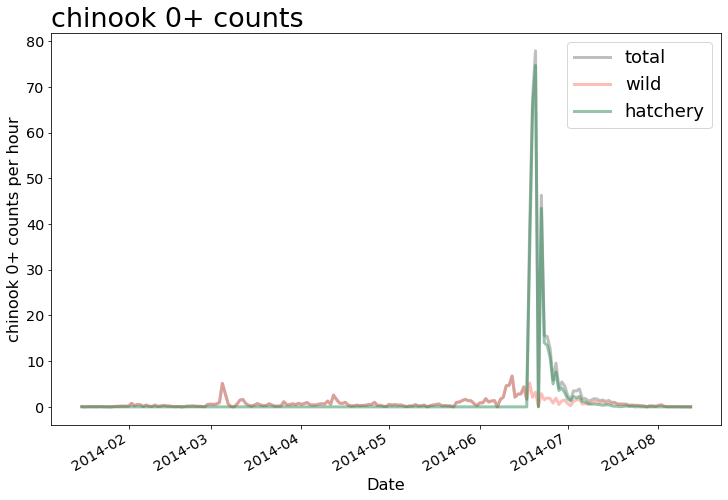

In [138]:
#chinook0
plot_fish_perhour(groupedby_dates_year,"chinook","0",["total","wild","hatchery"])

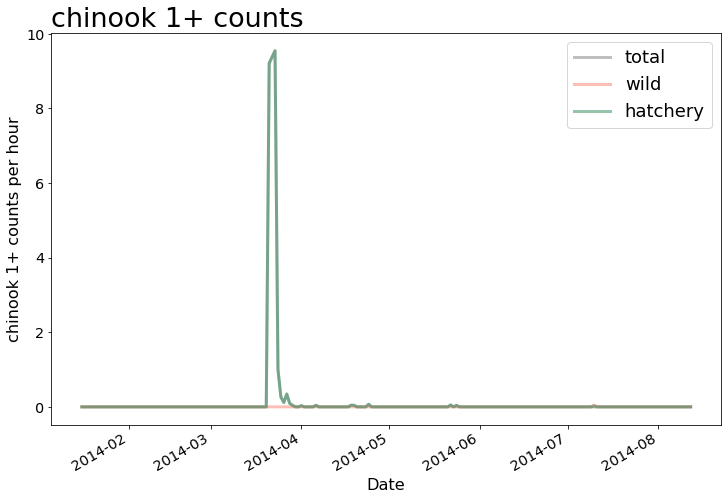

In [140]:
#chinook1
plot_fish_perhour(groupedby_dates_year,"chinook","1",["total","wild","hatchery"])

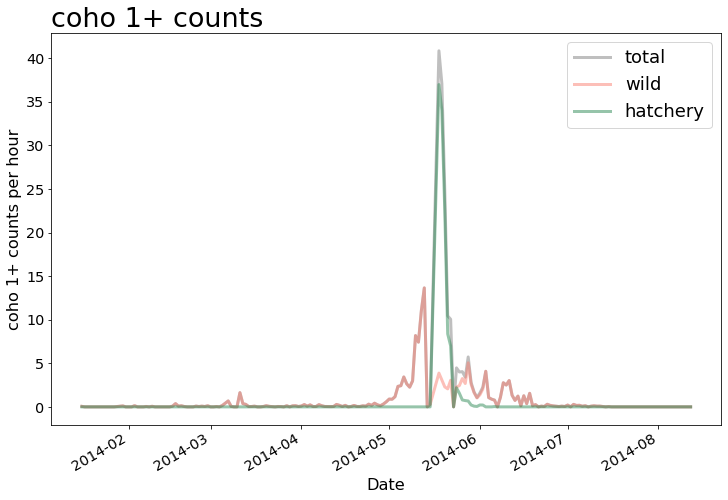

In [141]:
#coho1
plot_fish_perhour(groupedby_dates_year,"coho","1",["total","wild","hatchery"])

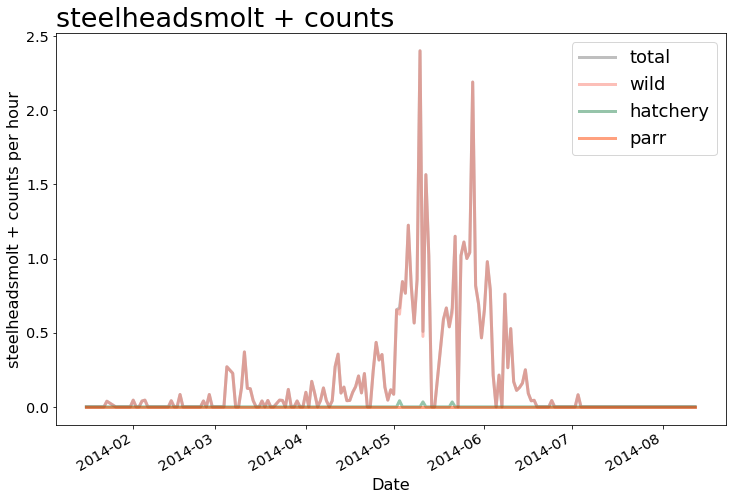

In [142]:
#coho1
plot_fish_perhour(groupedby_dates_year,"steelheadsmolt","",["total","wild","hatchery","parr"])

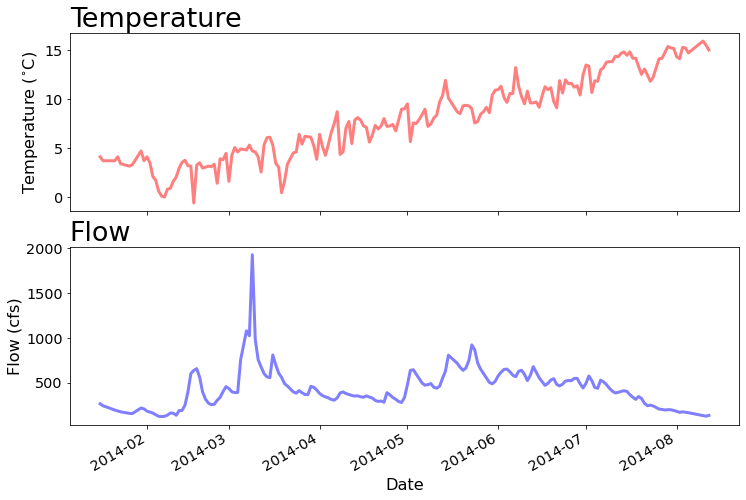

In [143]:
#plot temperature and flow
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
ax1.plot(
    groupedby_dates_year.index, groupedby_dates_year['temp'], color = 'red', 
    label = 'temperature', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Temperature '+ r'($^{\circ}$C)', size = 0.9*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Temperature', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')


#flow
ax2 = fig.add_subplot(212)
ax2.plot(
    groupedby_dates_year.index, groupedby_dates_year['flow'], color = 'blue', 
    label = 'flow', alpha = 0.5, linewidth = lw)
plt.gcf().autofmt_xdate()
plt.xlabel('Date', size = 0.9*fs)
plt.ylabel('Flow (cfs)', size = 0.9*fs)
ax2.tick_params(labelsize=.8*fs)
ax2.set_title('Flow', loc='left', fontsize = fs*1.5)
#plt.legend(fontsize=fs, loc='upper right', title = '')

plt.show()

In [144]:
groupedby_dates_year.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2014_dungeness.csv")  
df_year_temp_flow.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2014_dungeness_all.csv")

In [145]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year_temp_flow)

Date  Down_time              Up_date    Up_time  \
0    2014-01-16 00:00:00  15.000000  2014-01-17 00:00:00   8.500000   
1    2014-01-17 00:00:00   8.500000  2014-01-18 00:00:00  17.500000   
2    2014-01-18 00:00:00  17.500000  2014-01-19 00:00:00  10.250000   
3    2014-01-21 00:00:00  15.500000  2014-01-22 00:00:00  17.000000   
4    2014-01-22 00:00:00  17.000000  2014-01-23 00:00:00   8.250000   
5    2014-01-23 00:00:00   8.250000  2014-01-24 00:00:00  10.500000   
6    2014-01-26 00:00:00  11.500000  2014-01-26 00:00:00  17.500000   
7    2014-01-26 00:00:00  17.500000  2014-01-27 00:00:00   8.000000   
8    2014-01-27 00:00:00   8.000000  2014-01-27 00:00:00  17.500000   
9    2014-01-27 00:00:00  17.500000  2014-01-28 00:00:00   8.000000   
10   2014-01-30 00:00:00  13.750000  2014-01-31 00:00:00   8.000000   
11   2014-01-31 00:00:00   8.000000  2014-02-01 00:00:00  10.500000   
12   2014-02-01 00:00:00  10.500000  2014-02-02 00:00:00   8.500000   
13   2014-02-02 00:00:00   8.500000  2014-02-03 00:00:00  10.500000   
14   2014-02-03 00:00:00  10.500000  2014-02-04 00:00:00   8.500000   
15   2014-02-04 00:00:00   8.500000  2014-02-05 00:00:00  10.000000   
16   2014-02-05 00:00:00  10.000000  2014-02-06 00:00:00   8.000000   
17   2014-02-06 00:00:00   8.000000  2014-02-07 00:00:00  14.000000   
18   2014-02-07 00:00:00  14.000000  2014-02-08 00:00:00  12.000000   
19   2014-02-08 00:00:00  12.000000  2014-02-09 00:00:00  11.000000   
20   2014-02-09 00:00:00  11.000000  2014-02-10 00:00:00  17.000000   
21   2014-02-10 00:00:00  17.000000  2014-02-11 00:00:00   8.250000   
22   2014-02-11 00:00:00   8.250000  2014-02-11 00:00:00  17.000000   
23   2014-02-11 00:00:00  17.000000  2014-02-12 00:00:00   8.250000   
24   2014-02-12 00:00:00   8.250000  2014-02-12 00:00:00  17.000000   
25   2014-02-12 00:00:00  17.000000  2014-02-13 00:00:00   8.000000   
26   2014-02-13 00:00:00   8.000000  2014-02-13 00:00:00  18.000000   
27   2014-02-13 00:00:00  18.000000  2014-02-14 00:00:00   8.500000   
28   2014-02-14 00:00:00   8.500000  2014-02-14 00:00:00  17.500000   
29   2014-02-14 00:00:00  17.500000  2014-02-15 00:00:00   8.500000   
30   2014-02-15 00:00:00   8.500000  2014-02-15 00:00:00  18.000000   
31   2014-02-15 00:00:00  18.000000  2014-02-16 00:00:00   8.500000   
32   2014-02-16 00:00:00   8.500000  2014-02-16 00:00:00  17.000000   
33   2014-02-16 00:00:00  17.000000  2014-02-17 00:00:00   8.500000   
34   2014-02-17 00:00:00   8.500000  2014-02-17 00:00:00  17.000000   
35   2014-02-17 00:00:00  17.000000  2014-02-18 00:00:00   8.500000   
36   2014-02-18 00:00:00   8.500000  2014-02-18 00:00:00  17.000000   
37   2014-02-18 00:00:00  17.000000  2014-02-19 00:00:00   8.333333   
38   2014-02-19 00:00:00   8.333333  2014-02-19 00:00:00  17.000000   
39   2014-02-19 00:00:00  17.000000  2014-02-20 00:00:00   8.000000   
40   2014-02-20 00:00:00   8.000000  2014-02-20 00:00:00  17.500000   
41   2014-02-20 00:00:00  17.500000  2014-02-21 00:00:00   8.500000   
42   2014-02-21 00:00:00   8.500000  2014-02-21 00:00:00  17.000000   
43   2014-02-21 00:00:00  17.000000  2014-02-22 00:00:00   8.500000   
44   2014-02-22 00:00:00   8.500000  2014-02-22 00:00:00  16.500000   
45   2014-02-22 00:00:00  16.500000  2014-02-23 00:00:00   9.000000   
46   2014-02-23 00:00:00   9.000000  2014-02-23 00:00:00  17.000000   
47   2014-02-23 00:00:00  17.000000  2014-02-24 00:00:00   8.000000   
48   2014-02-24 00:00:00   8.000000  2014-02-24 00:00:00  17.000000   
49   2014-02-24 00:00:00  17.000000  2014-02-25 00:00:00   7.000000   
50   2014-02-25 00:00:00   7.000000  2014-02-25 00:00:00  17.500000   
51   2014-02-25 00:00:00  17.500000  2014-02-26 00:00:00   8.000000   
52   2014-02-26 00:00:00   8.000000  2014-02-26 00:00:00  17.500000   
53   2014-02-26 00:00:00  17.500000  2014-02-27 00:00:00   8.500000   
54   2014-02-27 00:00:00   8.500000  2014-02-27 00:00:00  16.000000   
55   2014-02-27 00:00:00  16.000000  2014-02

In [146]:
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(df_midpoint.index.floor('60T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Hat1',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Coho1_Hat2',
                                                  'Coho1_Hat3',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'] + groupedby_time_year_subset['Chinook1_Hat1'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'] +groupedby_time_year_subset['Coho1_Hat2']+groupedby_time_year_subset['Coho1_Hat3'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()


groupedby_time_year_subset['Steelhead1_Hat_all'] = (
    groupedby_time_year_subset['Steelhead1_Hat'] + groupedby_time_year_subset['Steelhead1_Hat1'])

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat_all']/groupedby_time_year_subset['Steelhead1_Hat_all'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

Chinook0_Hat  Chinook0_Hat1  Chinook0_Wild  Chinook1_Hat  \
00:00:00      0.004558       1.745537       0.587923      0.002279   
01:00:00      0.004827       0.792760       1.143891      0.000000   
02:00:00      0.005078       2.170123       1.609818      0.000000   
03:00:00      0.009063       1.187311       1.722054      0.000000   
04:00:00      0.163823      20.118316       1.278726      0.000000   
06:00:00      0.000000       0.000000       0.744186      0.000000   
08:00:00      0.000000       0.000000       0.000000      0.000000   
09:00:00      0.000000       0.000000       0.000000      0.000000   
11:00:00      0.050000       1.550000       0.400000      0.000000   
12:00:00      0.000000       0.000000       0.079112      0.000000   
13:00:00      0.000000       0.067666       0.266052      0.000000   
14:00:00      0.000000       0.045331       0.186763      0.000000   
15:00:00      0.034739       5.002481       0.287841      0.000000   
16:00:00      0.000000       0.000000       0.084746      0.000000   
17:00:00      0.000000       0.000000       0.000000      0.000000   
21:00:00      0.000000       0.000000       0.379919      0.000000   
22:00:00      0.000000       0.000000       1.060071      0.042403   
23:00:00      0.000000       0.000000       0.085106      0.000000   

          Chinook1_Hat1  Chinook1_Wild  Coho1_Wild  Coho1_Wild1  Coho1_Hat  \
00:00:00       0.476263       0.000000    0.047854     0.250665   1.123433   
01:00:00       0.002413       0.000000    0.218401     0.827753   2.038009   
02:00:00       0.000000       0.001693    0.424884     0.893779   0.142192   
03:00:00       0.039275       0.000000    0.921450     1.722054   0.163142   
04:00:00       0.040956       0.000000    0.496018     1.592719   0.928328   
06:00:00       0.046512       0.000000    0.000000     0.139535   0.000000   
08:00:00       0.000000       0.000000    0.000000     0.042553   0.000000   
09:00:00       0.000000       0.000000    0.000000     0.000000   0.000000   
11:00:00       0.000000       0.000000    0.000000     0.000000   0.000000   
12:00:00       0.000000       0.000000    0.000000     0.020819   0.000000   
13:00:00       0.003076       0.000000    0.003076     0.012303   0.099962   
14:00:00       0.000000       0.000000    0.001813     0.018132   0.027199   
15:00:00       0.000000       0.000000    0.009926     0.000000   0.000000   
16:00:00       0.000000       0.000000    0.000000     0.000000   0.000000   
17:00:00       0.000000       0.000000    0.000000     0.000000   0.000000   
21:00:00       0.824966       0.000000    0.000000     0.027137   0.000000   
22:00:00       0.296820       0.000000    0.169611     0.777385   1.978799   
23:00:00       0.000000       0.000000    0.000000     0.014184   0.000000   

          Coho1_Hat1  Coho1_Hat2  Coho1_Hat3  Steelhead1_Hat  Steelhead1_Hat1  \
00:00:00    0.000000         0.0    0.000000        0.000000              0.0   
01:00:00    0.000000         0.0    0.000000        0.000000              0.0   
02:00:00    0.000000         0.0    0.006771        0.000000              0.0   
03:00:00    0.000000         0.0    0.000000        0.003021              0.0   
04:00:00    0.000000         0.0    0.000000        0.009101              0.0   
06:00:00    0.000000         0.0    0.000000        0.000000              0.0   
08:00:00    0.000000         0.0    0.000000        0.000000              0.0   
09:00:00    0.000000         0.0    0.000000        0.000000              0.0   
11:00:00    0.000000         0.0    0.000000        0.000000              0.0   
12:00:00    0.000000         0.0    0.000000        0.000000              0.0   
13:00:00    0.001538         0.0    0.000000        0.000000              0.0   
14:00:00    0.000000         0.0    0.000000        0.000000              0.0   
15:00:00    0.000000         0.0    0.000000        0.000000              0.0   
16:00:00    0.000000         0.0    0.000000        0.000000  

In [147]:
#function to plot fish count by hour
def fish_count_by_hour(species = "Chinook", year = "1"):
    fs = 18
    lw = 3
    transparency = 0.5
    plt.close('all') # always start by cleaning up
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    my_day = datetime.date(2014, 7, 15)
    x_dt = [ datetime.datetime.combine(my_day, t) for t in groupedby_time_year_subset.index ]
    if species == "Steelhead":
        width_bar=(x_dt[1]-x_dt[0])*0.3
        x_dt1 = [(t - (width_bar)) for t in x_dt]
        x_dt2 = [(t) for t in x_dt]
        x_dt3 = [(t + (width_bar)) for t in x_dt]

        
        plt.bar(
            x_dt1, groupedby_time_year_subset['Steelhead1_Hat_prop'], color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, groupedby_time_year_subset['Steelhead1_Wild_prop'], color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt3, groupedby_time_year_subset['Steelhead1_Parr_prop'], color = 'orangered', 
            label = 'parr', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of Steelhead', loc='left', fontsize = fs*1.5)
        
    else:
        
        width_bar=(x_dt[1]-x_dt[0])*0.35
        x_dt1 = [(t - (width_bar/2)) for t in x_dt]
        x_dt2 = [(t + (width_bar/2)) for t in x_dt]

        if species == "Chinook":
            if year == "0":
                y_hat = groupedby_time_year_subset['Chinook0_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook0_Wild_prop']
            else:
                y_hat = groupedby_time_year_subset['Chinook1_Hat_prop']
                y_wild = y = groupedby_time_year_subset['Chinook1_Wild_prop']
        else:
            y_hat = groupedby_time_year_subset['Coho1_Hat_prop']
            y_wild = y = groupedby_time_year_subset['Coho1_Wild_prop']
                
        plt.bar(
            x_dt1, y_hat, color = 'seagreen', 
            label = 'hatchery', alpha = 0.5, width=width_bar)
        plt.bar(
            x_dt2, y_wild, color = 'salmon', 
            label = 'wild', alpha = 0.5, width=width_bar)
        # plt.gcf().autofmt_xdate()
        plt.xlabel('Time', size = 0.9*fs)
        plt.ylabel('Proportion of fish', size = 0.9*fs)
        ax1.tick_params(labelsize=.8*fs)

        plt.legend(fontsize=fs, loc='upper right', title = '')
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        ax1.set_title('Proportion of ' + species + year +'+', loc='left', fontsize = fs*1.5)

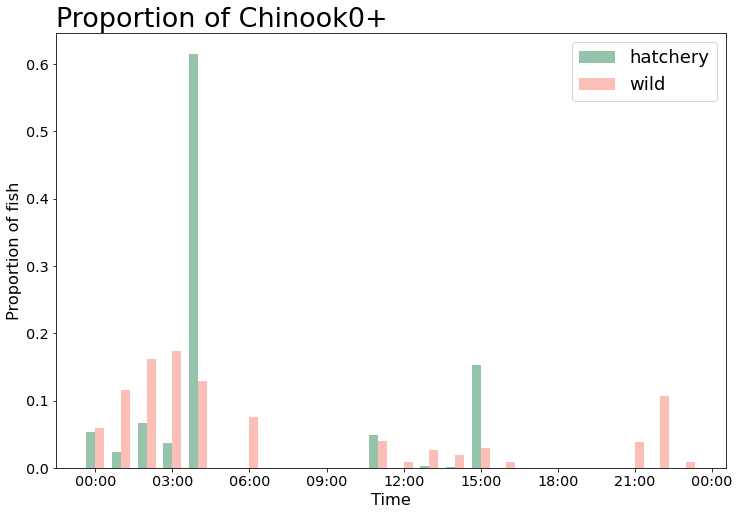

In [148]:
#chinook0
fish_count_by_hour("Chinook","0")

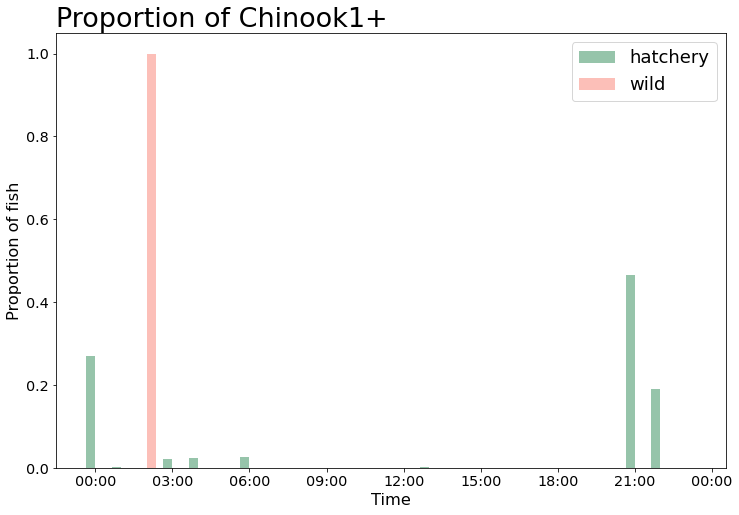

In [150]:
#chinook1
fish_count_by_hour("Chinook","1")

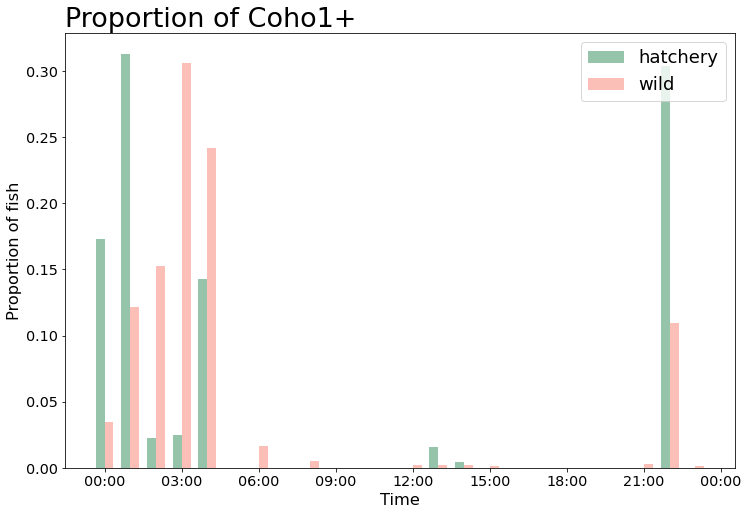

In [151]:
#coho1
fish_count_by_hour("Coho","1")

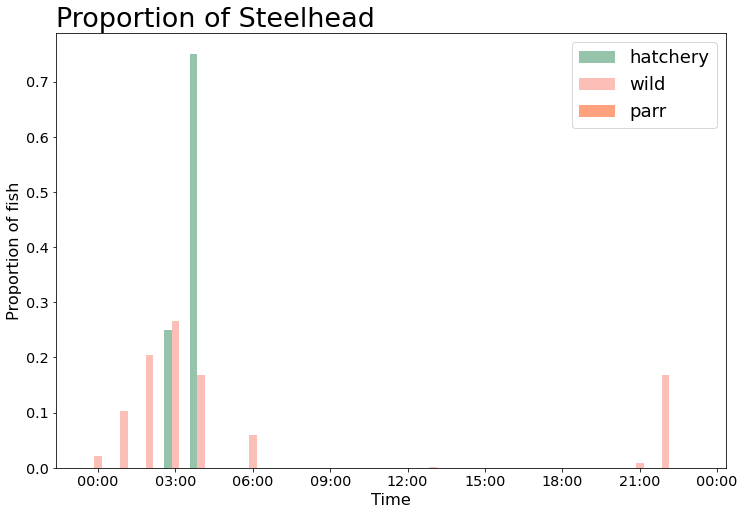

In [152]:
#chinook0
fish_count_by_hour("Steelhead","1")

In [153]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2014_dungeness_time.csv")  


In [1]:
import pandas as pd
year = "2014"
csv_name ="C:/Users/maria/OneDrive/Documents/data/pied_piper/"+str(year)+"_dungeness_all.csv"
df_year_temp_flow = pd.read_csv(csv_name, header=0) 
df_midpoint = df_year_temp_flow.set_index('midpoint')

groupedby_time_year = df_midpoint.groupby(pd.to_datetime(df_midpoint.index).floor('480T').time).sum()
# print(df_midpoint)

groupedby_time_year_subset = groupedby_time_year[['Chinook0_Hat',
                                                  'Chinook0_Hat1',
                                                  'Chinook0_Wild',
                                                  'Chinook1_Hat',
                                                  'Chinook1_Hat1',
                                                  'Chinook1_Wild',
                                                  'Coho1_Wild',
                                                  'Coho1_Wild1',
                                                  'Coho1_Hat',
                                                  'Coho1_Hat1',
                                                  'Coho1_Hat2',
                                                  'Coho1_Hat3',
                                                  'Steelhead1_Hat',
                                                  'Steelhead1_Hat1',
                                                  'Steelhead1_Wild',
                                                  'Steelhead1_Wild1',
                                                  'Trout Parr_Wild_Steelhead']].div(groupedby_time_year['In'],axis = 0)

groupedby_time_year_subset['Chinook0_Hat_all'] = (
    groupedby_time_year_subset['Chinook0_Hat']+groupedby_time_year_subset['Chinook0_Hat1'])

groupedby_time_year_subset['Chinook0_Hat_prop'] = groupedby_time_year_subset['Chinook0_Hat_all']/groupedby_time_year_subset['Chinook0_Hat_all'].sum()

groupedby_time_year_subset['Chinook0_Wild_prop'] = groupedby_time_year_subset['Chinook0_Wild']/groupedby_time_year_subset['Chinook0_Wild'].sum()



groupedby_time_year_subset['Chinook1_Hat_all'] = (
    groupedby_time_year_subset['Chinook1_Hat'] + groupedby_time_year_subset['Chinook1_Hat1'])

groupedby_time_year_subset['Chinook1_Hat_prop'] = (
    groupedby_time_year_subset['Chinook1_Hat_all'])/groupedby_time_year_subset['Chinook1_Hat_all'].sum()

groupedby_time_year_subset['Chinook1_Wild_prop'] = groupedby_time_year_subset['Chinook1_Wild']/groupedby_time_year_subset['Chinook1_Wild'].sum()



groupedby_time_year_subset['Coho1_Wild_all'] = groupedby_time_year_subset['Coho1_Wild']+groupedby_time_year_subset['Coho1_Wild1']

groupedby_time_year_subset['Coho1_Wild_prop'] = groupedby_time_year_subset['Coho1_Wild_all']/groupedby_time_year_subset['Coho1_Wild_all'].sum()

groupedby_time_year_subset['Coho1_Hat_all'] = (
    groupedby_time_year_subset['Coho1_Hat']+groupedby_time_year_subset['Coho1_Hat1'] +groupedby_time_year_subset['Coho1_Hat2']+groupedby_time_year_subset['Coho1_Hat3'])


groupedby_time_year_subset['Coho1_Hat_prop'] = groupedby_time_year_subset['Coho1_Hat_all']/groupedby_time_year_subset['Coho1_Hat_all'].sum()



groupedby_time_year_subset['Steelhead1_Wild_all'] = groupedby_time_year_subset['Steelhead1_Wild'] + groupedby_time_year_subset['Steelhead1_Wild1']

groupedby_time_year_subset['Steelhead1_Wild_prop'] = groupedby_time_year_subset['Steelhead1_Wild_all']/groupedby_time_year_subset['Steelhead1_Wild_all'].sum()


groupedby_time_year_subset['Steelhead1_Hat_all'] = (
    groupedby_time_year_subset['Steelhead1_Hat'] + groupedby_time_year_subset['Steelhead1_Hat1'])

groupedby_time_year_subset['Steelhead1_Hat_prop'] = groupedby_time_year_subset['Steelhead1_Hat_all']/groupedby_time_year_subset['Steelhead1_Hat_all'].sum()

groupedby_time_year_subset['Steelhead1_Parr_prop'] = groupedby_time_year_subset['Trout Parr_Wild_Steelhead']/groupedby_time_year_subset['Trout Parr_Wild_Steelhead'].sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_time_year_subset)

Chinook0_Hat  Chinook0_Hat1  Chinook0_Wild  Chinook1_Hat  \
00:00:00      0.019748       3.093496       1.244146      0.000411   
08:00:00      0.004699       0.650839       0.212051      0.000000   
16:00:00      0.000000       0.000000       0.400513      0.007702   

          Chinook1_Hat1  Chinook1_Wild  Coho1_Wild  Coho1_Wild1  Coho1_Hat  \
00:00:00       0.096273       0.000411    0.356704     0.924469   1.038434   
08:00:00       0.001175       0.000000    0.002937     0.014098   0.046992   
16:00:00       0.444159       0.000000    0.030809     0.156611   0.359435   

          Coho1_Hat1  Coho1_Hat2  Coho1_Hat3  Steelhead1_Hat  Steelhead1_Hat1  \
00:00:00    0.000000         0.0    0.001646        0.001234              0.0   
08:00:00    0.000587         0.0    0.000000        0.000000              0.0   
16:00:00    0.000000         0.0    0.000000        0.000000              0.0   

          Steelhead1_Wild  Steelhead1_Wild1  Trout Parr_Wild_Steelhead  \
00:00:00         0.250557          0.079816                        0.0   
08:00:00         0.000587          0.000000                        0.0   
16:00:00         0.069320          0.012837                        0.0   

          Chinook0_Hat_all  Chinook0_Hat_prop  Chinook0_Wild_prop  \
00:00:00          3.113244           0.826061            0.670081   
08:00:00          0.655539           0.173939            0.114208   
16:00:00          0.000000           0.000000            0.215711   

          Chinook1_Hat_all  Chinook1_Hat_prop  Chinook1_Wild_prop  \
00:00:00          0.096685           0.175879                 1.0   
08:00:00          0.001175           0.002137                 0.0   
16:00:00          0.451861           0.821983                 0.0   

          Coho1_Wild_all  Coho1_Wild_prop  Coho1_Hat_all  Coho1_Hat_prop  \
00:00:00        1.281174         0.862379       1.040080        0.718737   
08:00:00        0.017035         0.011466       0.047579        0.032879   
16:00:00        0.187420         0.126155       0.359435        0.248384   

          Steelhead1_Wild_all  Steelhead1_Wild_prop  Steelhead1_Hat_all  \
00:00:00             0.330373              0.799708            0.001234   
08:00:00             0.000587              0.001422            0.000000   
16:00:00             0.082157              0.198870            0.000000   

          Steelhead1_Hat_prop  Steelhead1_Parr_prop  
00:00:00                  1.0                   NaN  
08:00:00                  0.0                   NaN  
16:00:00                  0.0                   NaN

In [2]:
groupedby_time_year_subset.to_csv("C:/Users/maria/OneDrive/Documents/data/pied_piper/2014_dungeness_time_daylight.csv")  
